
# Machine Learning Model Lifecycle

## 1. Preprocessing + Exploratory Data Analysis + Feature Selection

* **Preprocessing:** This step involves cleaning and preparing the data for modeling. This may include removing missing values, dealing with outliers, and transforming the data into a format that is suitable for the machine learning algorithm.
* **Exploratory Data Analysis (EDA):** This step involves exploring the data to gain insights into the relationships between the features and the target variable. This can help to identify which features are important and which features may be correlated with each other.
* **Feature Selection:** This step involves selecting a subset of features that are most likely to be important for the machine learning model. This can help to improve the performance of the model and reduce the risk of overfitting.

## 2. Extract Input and Output

* **Input:** The input data is the data that the machine learning model will use to make predictions. This data may include features such as the customer's age, income, and purchase history.
* **Output:** The output of the machine learning model is the prediction that the model makes. This prediction may be a class label, such as "spam" or "not spam," or it may be a continuous value, such as the price of a house.

## 3. Scale the value

* **Scaling:** This step involves scaling the data so that all of the features have a similar range of values. This is important because machine learning algorithms often work better when the features are scaled.

## 4. Train Test Split

* **Train:** The training data is used to train the machine learning model. The model learns to make predictions by finding patterns in the training data.
* **Test:** The test data is used to evaluate the performance of the machine learning model. The model makes predictions on the test data and the predictions are compared to the actual values.

## 5. Train the model

* **Algorithm:** This is the machine learning algorithm that will be used to build the model. There are many different machine learning algorithms available, each with its own strengths and weaknesses.
* **Parameters:** The parameters of the machine learning algorithm are the settings that control how the algorithm works. The parameters can be tuned to improve the performance of the model.

## 6. Evaluate the model

* **Metrics:** There are many different metrics that can be used to evaluate the performance of a machine learning model. Some common metrics include accuracy, precision, recall, and F1 score.
* **Error analysis:** This step involves analyzing the errors that the model makes. This can help to identify areas where the model can be improved.

## 7. Deploy the model

* **Deployment:** Once the model is trained and evaluated, it can be deployed in production. This means that the model can be used to make predictions on new data.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/placement.csv')

In [ ]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [ ]:
df.isna().any()

Unnamed: 0    False
cgpa          False
iq            False
placement     False
dtype: bool

In [ ]:
df.sample(5)

,Unnamed: 0,cgpa,iq,placement
23,23,4.7,87.0,0
51,51,4.8,141.0,0
73,73,4.9,61.0,0
90,90,7.3,86.0,1
41,41,5.4,114.0,0


## 1.Preprocessing

In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.sample(3)

,cgpa,iq,placement
2,5.3,121.0,0
78,6.1,81.0,0
27,6.0,124.0,1


##EDA- Explorartory Data Analysis

In [ ]:
import matplotlib.pyplot as plt


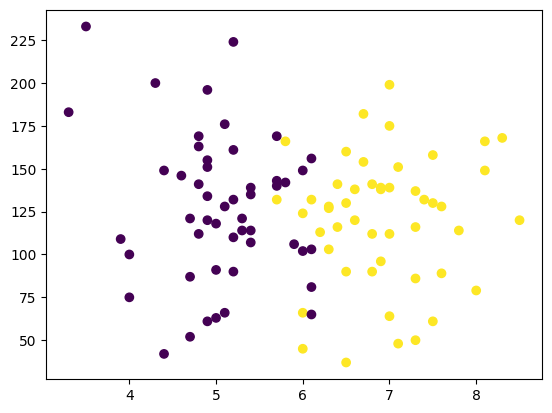

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

## 2. Extract Input and Output

In [ ]:
X=df.iloc[:,:-1]

In [ ]:
y=df.iloc[:,-1]

In [ ]:
X.shape

(99, 2)

In [ ]:
y.shape

(99,)

##Here, X.shape-> (99,2) which means X is a matrix
##Y.shape-> (99,) which means Y is a vector

## 4.Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [ ]:
y_train

46    0
12    0
36    0
67    0
1     0
     ..
86    0
68    0
17    0
93    1
66    1
Name: placement, Length: 66, dtype: int64

##3. Scaling the dependant values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_train

In [ ]:
X_test=scaler.fit_transform(X_test)
X_test

##5. Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_test

20    1
43    1
28    0
69    1
53    1
39    0
45    1
78    0
7     0
49    0
31    0
51    0
94    0
38    1
90    1
62    0
75    0
79    1
19    0
4     0
48    1
89    0
73    0
33    0
5     1
74    1
96    0
25    0
88    0
80    0
41    0
35    1
70    1
Name: placement, dtype: int64

##6.Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8787878787878788

## Ploting the Decision Boundary

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

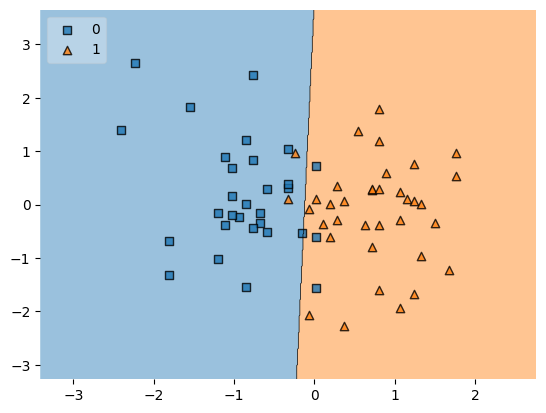

In [ ]:

# Plotting decision regions
plot_decision_regions(X_train, y_train.values, clf=model, legend=2)

##7.Deploy the model

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))